In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
train_df = pd.read_csv('train.csv')
# print(train_df.head())
test_df = pd.read_csv('test.csv')
# print(test_df.head())

In [21]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64
ID             0
datetime       0
temperature    0
var1           0
pressure       0
windspeed      0
var2           0
dtype: int64


In [22]:
train_df['day'] = pd.to_datetime(train_df['datetime']).dt.day
train_df['month'] = pd.to_datetime(train_df['datetime']).dt.month
train_df['year'] = pd.to_datetime(train_df['datetime']).dt.year
train_df['hour'] = pd.to_datetime(train_df['datetime']).dt.hour


test_df['new_date'] = pd.to_datetime(test_df['datetime']).dt.day
test_df['new_time'] = pd.to_datetime(test_df['datetime']).dt.month
test_df['new_date'] = pd.to_datetime(test_df['datetime']).dt.year
test_df['new_time'] = pd.to_datetime(test_df['datetime']).dt.hour

In [23]:
# example of a one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(sparse=False)

# transform data
onehot_train = encoder.fit_transform(asarray(train_df['var2']).reshape(-1,1))
# print(onehot_train)
onehot_test = encoder.fit_transform(asarray(test_df['var2']).reshape(-1,1))
# print(onehot_test)

In [24]:
train_df[['var2_1', 'var2_2', 'var2_3']] = onehot_train
# print(train_df)
test_df[['var2_1', 'var2_2', 'var2_3']] = onehot_test
# print(test_df)

In [25]:
new_train = train_df.drop(['var2', 'datetime', 'ID'], axis = 1)
new_test = test_df.drop(['var2', 'datetime', 'ID'], axis = 1)
print(new_train)
print(new_test)

       temperature  var1  pressure  windspeed  electricity_consumption  day  \
0            -11.4 -17.1    1003.0    571.910                    216.0    1   
1            -12.1 -19.3     996.0    575.040                    210.0    1   
2            -12.9 -20.0    1000.0    578.435                    225.0    1   
3            -11.4 -17.1     995.0    582.580                    216.0    1   
4            -11.4 -19.3    1005.0    586.600                    222.0    1   
...            ...   ...       ...        ...                      ...  ...   
26491         -0.7 -15.0    1009.0     51.685                    225.0   23   
26492         -2.9 -11.4    1005.0     56.105                    213.0   23   
26493         -1.4 -12.9     995.0     61.275                    213.0   23   
26494         -2.9 -11.4     996.0     67.210                    210.0   23   
26495         -2.1 -11.4    1009.0     71.880                    210.0   23   

       month  year  hour  var2_1  var2_2  var2_3  


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score



dependent = new_train.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11]]
# print(independent)
independent = new_train.iloc[:, 4]


x_train, x_validation, y_train, y_validation = train_test_split(dependent, independent, train_size = 0.7, shuffle = True, random_state = 5)
#     print(x_train)

# Normalization
x_train_normalize = preprocessing.normalize(x_train)
y_train_normalize = preprocessing.normalize(np.asarray(y_train).reshape(1, -1))
x_validation_normalize = preprocessing.normalize(x_validation)
y_validation_normalize = preprocessing.normalize(np.asarray(y_validation).reshape(1, -1))

model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train_normalize, y_train_normalize.reshape(-1,1))  #fit the model
pred=model.predict(x_validation_normalize) #make prediction on test set
# print(mean_squared_error(y_validation, pred))
rmse = sqrt(mean_squared_error(y_validation_normalize.reshape(-1,1), pred)) #calculate rmse
#store rmse values
print('RMSE value is:', rmse)
# accuracy = accuracy_score(y_validation_normalize.reshape(-1,1), pred)

    
    
    

RMSE value is: 0.004708896789792069


In [27]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(x_train_normalize, y_train_normalize.reshape(-1,1))

pred_lm = regr.predict(x_validation_normalize)

rmse_lm = sqrt(mean_squared_error(y_validation_normalize.reshape(-1,1), pred_lm))
rmse_lm

0.004990081877683208

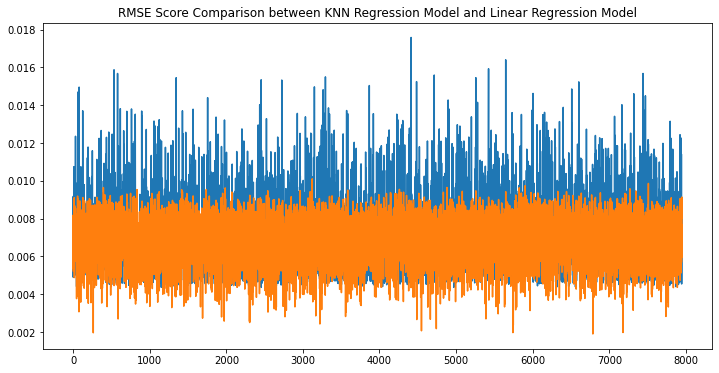

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(pred)
plt.plot(pred_lm)
plt.title("RMSE Score Comparison between KNN Regression Model and Linear Regression Model")
plt.show()